# Surrogates - Chapter 1
> A Python attempt to revise Surrogates GP

- toc: true 
- badges: true
- comments: true
- author: Zeel Patel
- categories: [GP]

In [69]:
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import pandas as pd
import numpy as np
rc('font',size=12)

# 1.1.1

## Simple order 1 polynomial $\eta = 50 + 8x_1 + 3x_2$

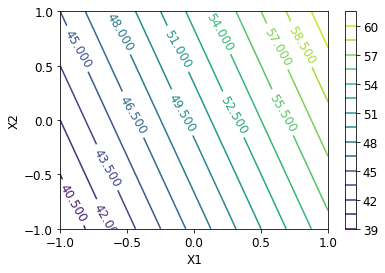

In [75]:
def first_order(x1, x2):
    return 50 + 8*x1 + 3*x2

fig, ax = plt.subplots()
x1 = x2 = np.linspace(-1,1,100)
X1, X2 = np.meshgrid(x1, x2)
z = first_order(X1, X2)
cntr = plt.contour(X1, X2, z, levels=20);plt.xlabel('X1');plt.ylabel('X2');
plt.xticks([-1,-0.5,0,0.5,1]);plt.yticks([-1,-0.5,0,0.5,1])
ax.clabel(cntr)
plt.colorbar();

## Adding interaction term $\eta = 50 + 8x_1 + 3x_2  - 4x_1x_2$

In [77]:
def first_order_i(x1, x2, c0=50, c1=8, c2=3, c3=4):
    return c0 + c1*x1 + c2*x2 - c3*x1*x2
x1 = x2 = np.linspace(-1,1,100)
X1, X2 = np.meshgrid(x1, x2)

fig, ax = plt.subplots()
def update(c3):
    ax.cla()
    z = first_order_i(X1, X2, c3=c3)
    cntr = ax.contour(X1, X2, z, levels=20);
    ax.set_xlabel('X1');ax.set_ylabel('X2');
    ax.set_xticks([-1,-0.5,0,0.5,1]);ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.clabel(cntr);
    ax.set_title('c3 = '+str(c3))

anim = FuncAnimation(fig, update, frames=np.arange(-4,5))
plt.close()
rc('animation',html='jshtml')
anim

## Adding squared terms $\eta = 50 + 8x_1 + 3x_2 - 7x_1^2 - 3x_2^2 - 4x_1x_2$

In [81]:
def simple_max(x1, x2, c0=50, c1=8, c2=3, c3=7, c4=3, c5=4):
    return c0 + c1*x1 + c2*x2 - c3*np.square(x1) - c4*np.square(x2) - c5*x1*x2
x1 = x2 = np.linspace(-1,1,100)
X1, X2 = np.meshgrid(x1, x2)

fig, ax = plt.subplots()
def update(c3):
    ax.cla()
    z = simple_max(X1, X2, c3=c3)
    cntr = ax.contour(X1, X2, z, levels=20);
    ax.set_xlabel('X1');ax.set_ylabel('X2');
    ax.set_xticks([-1,-0.5,0,0.5,1]);ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.clabel(cntr);
    ax.set_title('c3 = '+str(c3))

anim = FuncAnimation(fig, update, frames=np.arange(7-3,7+4))
plt.close()
rc('animation',html='jshtml')
anim

### Stationary ridge $80+4x_1+8x_2-3x_1^2-12x_2^2-12x_1x_2$

In [85]:
def stat_ridge(x1, x2, c1=80, c2=4, c3=8, c4=3, c5=12, c6=12):
    return c1 + c2*x1 + c3*x2 - c4*np.square(x1) - c5*np.square(x2) - c6*x1*x2
x1 = x2 = np.linspace(-1,1,100)
X1, X2 = np.meshgrid(x1, x2)

fig, ax = plt.subplots()
def update(c2):
    ax.cla()
    z = stat_ridge(X1, X2, c2=c2)
    cntr = ax.contour(X1, X2, z, levels=20);
    ax.set_xlabel('X1');ax.set_ylabel('X2');
    ax.set_xticks([-1,-0.5,0,0.5,1]);ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.clabel(cntr);
    ax.set_title('c2 = '+str(c2))

anim = FuncAnimation(fig, update, frames=np.arange(-4,9))
plt.close()
rc('animation',html='jshtml')
anim

## Saddle 

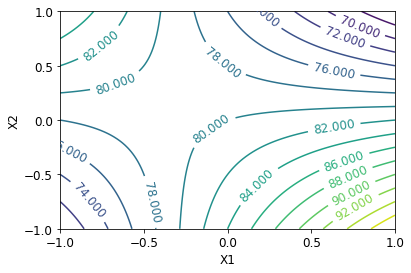

In [88]:
def saddle(x1, x2, c0=80, c1=4, c2=8, c3=2, c4=12, c5=12):
    return c0 + c1*x1 + c2*x2 - c3*x1 - c4*x2 - c5*x1*x2

fig, ax = plt.subplots()
x1 = x2 = np.linspace(-1,1,100)
X1, X2 = np.meshgrid(x1, x2)
z = saddle(X1, X2)
cntr = plt.contour(X1, X2, z, levels=20);plt.xlabel('X1');plt.ylabel('X2');
plt.xticks([-1,-0.5,0,0.5,1]);plt.yticks([-1,-0.5,0,0.5,1])
ax.clabel(cntr);

## 1.2.1 Aircraft wing weight example

In [95]:
def wingwt(Sw=0.48, Wfw=0.4, A=0.38, L=0.5, q=0.62, l=0.344, 
  Rtc=0.4, Nz=0.37, Wdg=0.38):
  ## put coded inputs back on natural scale
  Sw = Sw*(200 - 150) + 150 
  Wfw = Wfw*(300 - 220) + 220 
  A = A*(10 - 6) + 6 
  L = (L*(10 - (-10)) - 10) * np.pi/180
  q = q*(45 - 16) + 16 
  l = l*(1 - 0.5) + 0.5 
  Rtc = Rtc*(0.18 - 0.08) + 0.08
  Nz = Nz*(6 - 2.5) + 2.5
  Wdg = Wdg*(2500 - 1700) + 1700

  ## calculation on natural scale
  W = 0.036*Sw**0.758 * Wfw**0.0035 * (A/np.cos(L)**2)**0.6 * q**0.006 
  W = W * l**0.04 * (100*Rtc/np.cos(L))**(-0.3) * (Nz*Wdg)**(0.49)
  return(W)

Generating $100 \times 100$ grid to check interactions between $A$ (aspect ratio) and $N_z$ (ultimate load factor)

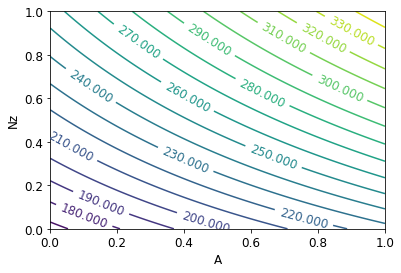

In [98]:
x1 = x2 = np.linspace(0,1,100)
A, Nz = np.meshgrid(x1, x2)
wt = wingwt(A=A, Nz=Nz)

fig, ax = plt.subplots()
cntr = plt.contour(A, Nz, wt, levels=20);plt.xlabel('A');plt.ylabel('Nz');
ticks = [0,0.2,0.4,0.6,0.8,1]
plt.xticks(ticks);plt.yticks(ticks)
ax.clabel(cntr);

Now, checking interactions between $\lambda$ (taper ratio) and $W_{fw}$ (weight of fuel in wing)

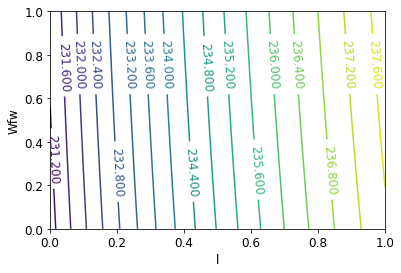

In [99]:
x1 = x2 = np.linspace(0,1,100)
l, Wfw = np.meshgrid(x1, x2)
wt = wingwt(l=l, Wfw=Wfw)

fig, ax = plt.subplots()
cntr = plt.contour(l, Wfw, wt, levels=20);plt.xlabel('l');plt.ylabel('Wfw');
ticks = [0,0.2,0.4,0.6,0.8,1]
plt.xticks(ticks);plt.yticks(ticks)
ax.clabel(cntr);

Generating grids for each pair (total $^9C_2$ = 36) and evaluating $100 \times 100$ grid is not computationally tengible.

Let's generate 1000 Latin Hypercube samples (LHS) for 9 dimensions of interest. 

In [130]:
import pyDOE2

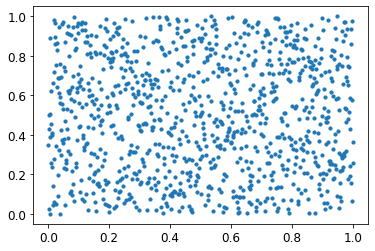

In [131]:
X = pyDOE2.doe_lhs.lhs(9, 1000, random_state=0)
plt.scatter(X[:,0], X[:,1], s=10);

Now, We will evaluate this input space in wingwt function to generate response variable wing weight.

In [134]:
Y = wingwt(*[X[:,i] for i in range(9)])
Y.shape

(1000,)

We fit the only features given in book chosen by backward step selection and BIC criterion

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(2, interaction_only=True, include_bias=False)
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

model = LinearRegression()
model.fit(trans.fit_transform(X)[:,[0,2,4,5,6,7,8,37]], np.log(Y));
ic = model.intercept_.round(4)
coef = model.coef_.round(4)

In [221]:
print({'Intercept':ic,'Sw':coef[0],'A':coef[1],'q':coef[2],'l':coef[3],
       'Rtc':coef[4],'Nz':coef[5],'Wdg':coef[6],'q:Nz':coef[7]})

{'Intercept': 5.0765, 'Sw': 0.2186, 'A': 0.305, 'q': 0.0048, 'l': 0.0278, 'Rtc': -0.2378, 'Nz': 0.4179, 'Wdg': 0.1882, 'q:Nz': 0.0028}


As per book, interaction between A and Nz is not captured though we know it exists.

Now, We will fit a GP and visualize interaction between A and Nz

In [222]:
import GPy

In [223]:
GP = GPy.models.GPRegression(X, Y.reshape(-1,1), GPy.kern.RBF(input_dim=9, active_dims=list(range(9)), ARD=True))
GP.optimize()

 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


In [229]:
wingwt

<function __main__.wingwt(Sw=0.48, Wfw=0.4, A=0.38, L=0.5, q=0.62, l=0.344, Rtc=0.4, Nz=0.37, Wdg=0.38)>

Creating a $100 \times 100$ grid of A and Nz and setting other parameters to baseline.

In [241]:
params = []
for param in range(9):
    param_val = wingwt.__defaults__[param]*np.ones((10000,1))
    params.append(param_val)

# Modify A and Nz at positions 2 and 7
params[2] = A.reshape(-1,1)
params[7] = Nz.reshape(-1,1)

# Create test grid
XX = np.hstack(params)
XX.shape

(10000, 9)

In [242]:
pred_Y, pred_Var = GP.predict(XX)

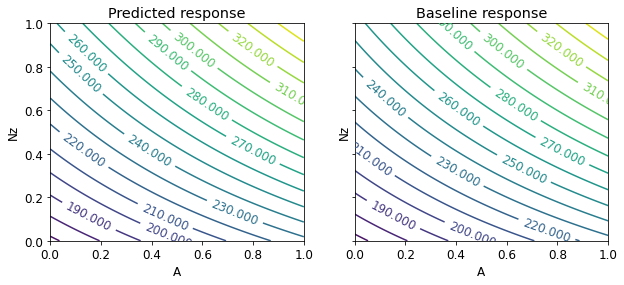

In [251]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True,figsize=(10,4))
cntr1 = ax[0].contour(A, Nz, pred_Y.reshape(100,100), levels=20);
ax[0].clabel(cntr1);
wt = wingwt(A=A, Nz=Nz)
cntr2 = ax[1].contour(A, Nz, wt, levels=20);
ax[1].clabel(cntr2);
ticks = [0,0.2,0.4,0.6,0.8,1]
for i in range(2):
    ax[i].set_xlabel('A');ax[i].set_ylabel('Nz');
    ax[i].set_xticks(ticks);ax[i].set_yticks(ticks)
ax[0].set_title('Predicted response')
ax[1].set_title('Baseline response');

Now, doing 1D sensitivity analysis for all 9 process variables

In [268]:
preds = []
for i in range(9):
    print(i,end='')
    params = []
    for param in range(9):
        param_val = wingwt.__defaults__[param]*np.ones((1000,1))
        params.append(param_val)

    # Modify ith parameter
    params[i] = np.linspace(0,1,1000).reshape(-1,1)

    # Create test grid
    XX = np.hstack(params)
    preds.append(GP.predict(XX)[0])
print(' Done')
# wingwt

012345678 Done


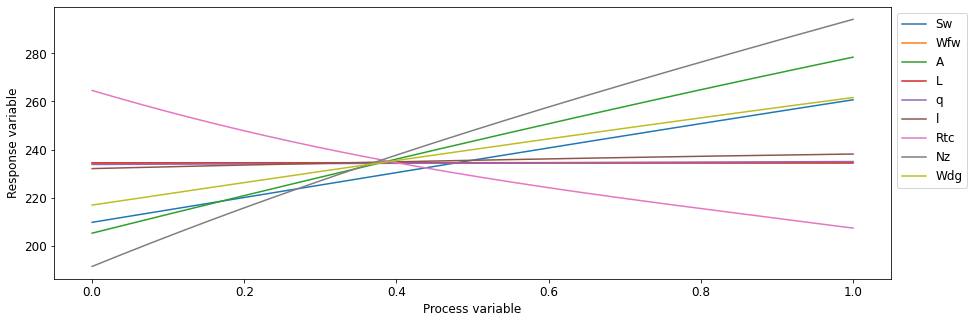

In [269]:
plt.figure(figsize=(15,5))
param_names = ['Sw','Wfw','A','L','q','l','Rtc','Nz','Wdg']
for i in range(9):
    plt.plot(np.linspace(0,1,1000), preds[i], label=param_names[i])
plt.legend(bbox_to_anchor=[1,1]);
plt.xlabel('Process variable');plt.ylabel('Response variable');

Variables l, L, Wfw and q are not very useful in determining yields of response variable. 